<a href="https://colab.research.google.com/github/Tadelebedo/datasharing/blob/master/AGBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [ ]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 66.1 MB/s eta 0:00:00


In [ ]:
!pip install geopandas rasterio

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import rasterio

In [ ]:
from google.colab import drive

In [ ]:
import geopandas as gpd
import rasterio
import pandas as pd
import numpy as np

In [ ]:
# Mount Google Drive (you will be prompted to authorize access)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define file paths (replace with your actual file paths in Google Drive)
shapefile_path = '/content/drive/My Drive/Gedi/GEDI_rh98_shapefile.shp'  # Update with your shapefile path
raster_path = '/content/drive/My Drive/Gedi/AGB_Factor_Stack.tif'        # Update with your raster stack path
output_csv = '/content/drive/My Drive/Gedi/traning.csv'

In [ ]:

# Read the shapefile containing point locations
points = gpd.read_file(shapefile_path)

# Open the raster stack and extract data
with rasterio.open(raster_path) as src:
    # Check and align the coordinate reference system (CRS)
    if points.crs != src.crs:
        points = points.to_crs(src.crs)

    # Extract coordinates from the point geometries
    coordinates = [(point.x, point.y) for point in points.geometry]

    # Sample raster values at the point locations
    values = list(src.sample(coordinates))

    # Get the number of bands and their descriptions
    num_bands = src.count
    descriptions = src.descriptions  # Tuple of band descriptions

# Convert the sampled values to a NumPy array
values_array = np.array(values)  # Shape: (number of points, number of bands)

# Create column names using actual band names from descriptions, falling back to 'bandX' if missing
band_columns = [desc if desc else f'band{i+1}' for i, desc in enumerate(descriptions)]

# Print the band columns for verification
print("Using band columns:", band_columns)

# Create a DataFrame from the sampled raster values
values_df = pd.DataFrame(values_array, columns=band_columns)

# Drop the geometry column from the shapefile data and keep other attributes
data = points.drop(columns='geometry')

# Combine the shapefile attributes with the raster values
final_data = pd.concat([data, values_df], axis=1)

# Save the combined data to a CSV file in Google Drive
final_data.to_csv(output_csv, index=False)

print(f"CSV file saved to {output_csv}")

Using band columns: ['B02_Blue', 'B03_Green', 'B04_Red', 'B05_RedEdge1', 'B06_RedEdge2', 'B07_RedEdge3', 'B08_NIR', 'B8A_NIR_Narrow', 'B11_SWIR1', 'B12_SWIR2', 'NDVI', 'EVI', 'SAVI', 'NDRE', 'MCARI', 'NDMI', 'MSI', 'GNDVI', 'ARVI', 'OSAVI', 'MTCI', 'B8_GLCM_Contrast', 'B8_GLCM_Entropy', 'B8_GLCM_IDM', 'B8_GLCM_Correlation', 'B8_GLCM_Variance', 'B4_GLCM_Contrast', 'B4_GLCM_Entropy', 'B4_GLCM_IDM', 'B4_GLCM_Correlation', 'B4_GLCM_Variance', 'NIR_StdDev', 'Red_StdDev', 'NDVI_Max', 'NDVI_Mean', 'NDVI_StdDev', 'SAR_VV', 'SAR_VH', 'SAR_VV_VH_Ratio', 'Elevation', 'Slope_Degrees', 'Aspect', 'Hillshade', 'TRI', 'TPI', 'TWI', 'Northness', 'Eastness', 'Annual_Precipitation', 'Mean_Temperature', 'MODIS_LAI', 'Tree_Cover_Percent']
CSV file saved to /content/drive/My Drive/Gedi/traning.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/My Drive/Gedi/traning.csv')

# Separate the features (X) and the target variable (y)
X = df.drop('rh98', axis=1)  # Features: all columns except 'rh98'
y = df['rh98']               # Target: 'rh98' column

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optionally, print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (184, 52)
X_test shape: (80, 52)
y_train shape: (184,)
y_test shape: (80,)


In [ ]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 36.35658119503144
R^2 Score: 0.5366891482724885


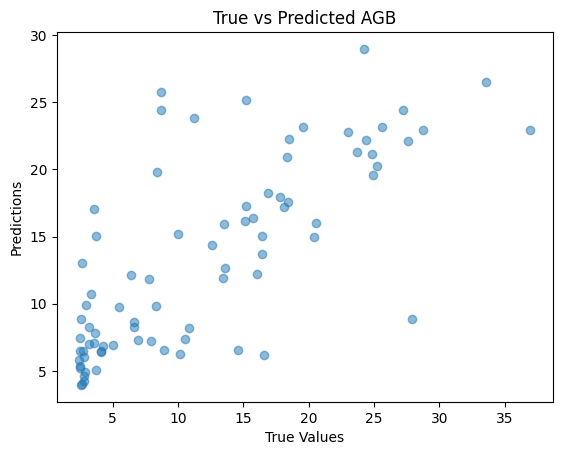

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted AGB')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, max_error

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Explained Variance Score: {evs}')
print(f'Maximum Error: {me}')

Mean Absolute Error: 4.495299391454256
Explained Variance Score: 0.5572936374032131
Maximum Error: 19.077950261333925


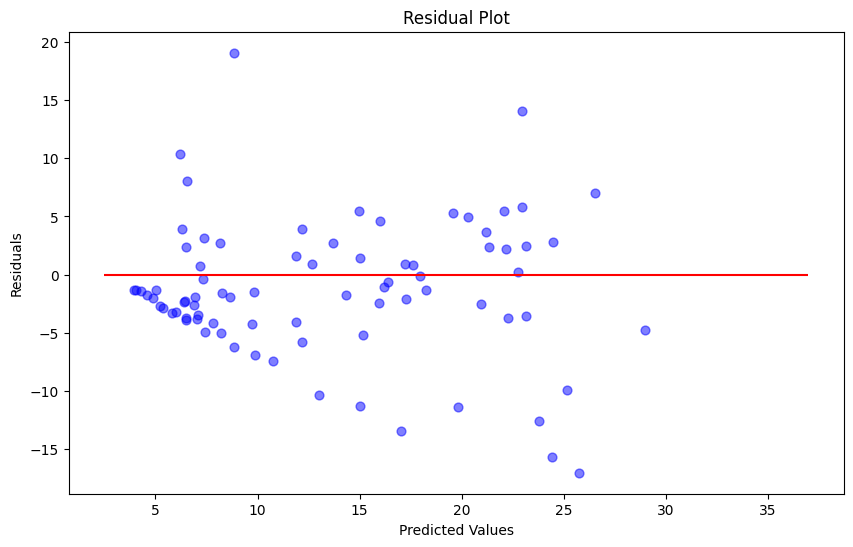

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
# plt.savefig('E:/CLIENTS/AGB/New/pred/residual_plot.png')
plt.close()

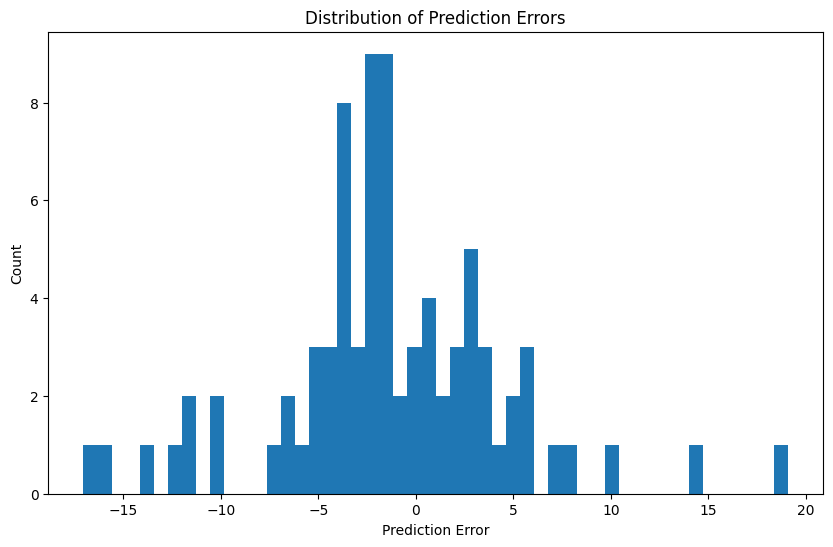

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()
plt.savefig('/content/drive/My Drive/Gedi/traning.png')
plt.close()


Feature Importance:
                 Feature  Importance
51    Tree_Cover_Percent    0.168775
3           B05_RedEdge1    0.116179
9              B12_SWIR2    0.071246
43                   TRI    0.070493
20                  MTCI    0.062973
13                  NDRE    0.061457
50             MODIS_LAI    0.024473
14                 MCARI    0.021410
15                  NDMI    0.021154
40         Slope_Degrees    0.020305
45                   TWI    0.020022
35           NDVI_StdDev    0.019307
39             Elevation    0.019229
23           B8_GLCM_IDM    0.017536
42             Hillshade    0.017505
29   B4_GLCM_Correlation    0.017049
1              B03_Green    0.015194
47              Eastness    0.014324
28           B4_GLCM_IDM    0.014148
0               B02_Blue    0.014034
37                SAR_VH    0.013120
48  Annual_Precipitation    0.012059
24   B8_GLCM_Correlation    0.011287
17                 GNDVI    0.011139
46             Northness    0.011096
44               

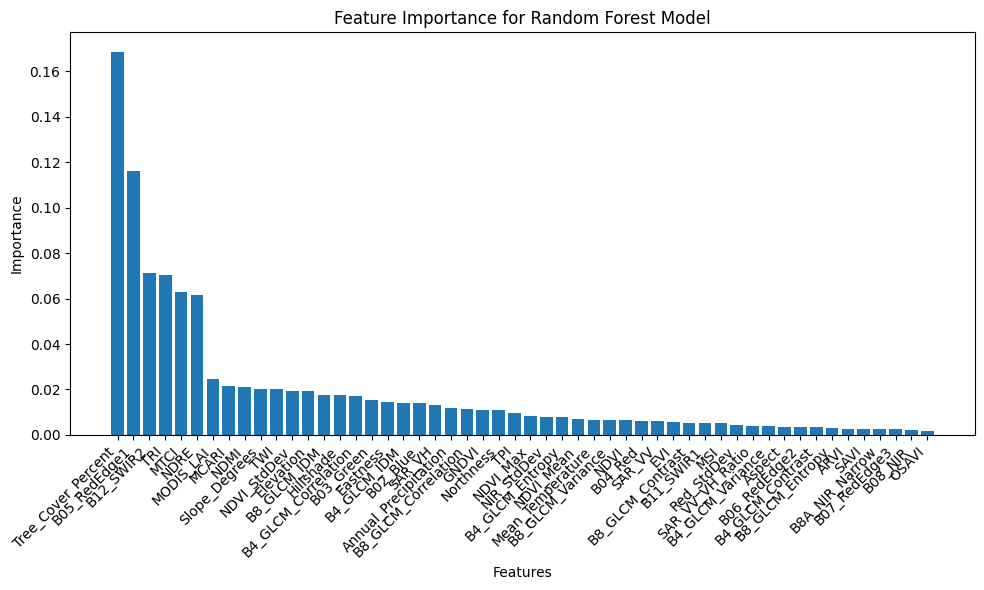

In [ ]:
# --- Calculate variable importance ---
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importance:")
print(importance_df)
importance_csv= '/content/drive/My Drive/Gedi/importance_csv.csv'
# Save feature importance to CSV
importance_df.to_csv(importance_csv, index=False)
print(f"Feature importance saved to {importance_csv}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# --- Predict for the entire raster stack ---
# Read the raster stack data
with rasterio.open(raster_path) as src:
    # Read all bands into a 3D NumPy array (bands, height, width)
    raster_data = src.read()  # Shape: (num_bands, height, width)
    profile = src.profile  # Save metadata for output raster
    nodata = src.nodata if src.nodata is not None else -9999  # Define nodata value

# Reshape the raster data for prediction
n_samples = raster_data.shape[1] * raster_data.shape[2]  # height * width
# Reshape to (n_samples, num_bands) for model input
combined_data_reshaped = raster_data.reshape(raster_data.shape[0], n_samples).T  # Shape: (n_samples, num_bands)

# Create a DataFrame with the same column names as used in training
raster_df = pd.DataFrame(combined_data_reshaped, columns=band_columns)

# Handle nodata values: mark rows where any band has nodata
nodata_mask = np.any(combined_data_reshaped == nodata, axis=1)


In [ ]:
output_raster_path = '/content/drive/My Drive/Gedi/predicted_AGB.tif'

# Predict for all valid pixels
predictions = np.full(n_samples, nodata, dtype=np.float32)  # Initialize with nodata
if len(raster_df[~nodata_mask]) > 0:  # Only predict for non-nodata pixels
    predictions[~nodata_mask] = model.predict(raster_df[~nodata_mask])

# Reshape predictions back to the original raster shape (height, width)
prediction_reshaped = predictions.reshape(raster_data.shape[1], raster_data.shape[2])  # Shape: (height, width)

# Update the profile for the output raster (single band)
profile.update(
    count=1,  # Single band for predictions
    dtype=rasterio.float32,  # Use float32 for predictions
    nodata=nodata  # Set nodata value
)

# Save the predictions to a new raster
with rasterio.open(output_raster_path, 'w', **profile) as dst:
    dst.write(prediction_reshaped, 1)  # Write the predictions to band 1

print(f"Prediction raster saved to {output_raster_path}")

Prediction raster saved to /content/drive/My Drive/Gedi/predicted_AGB.tif


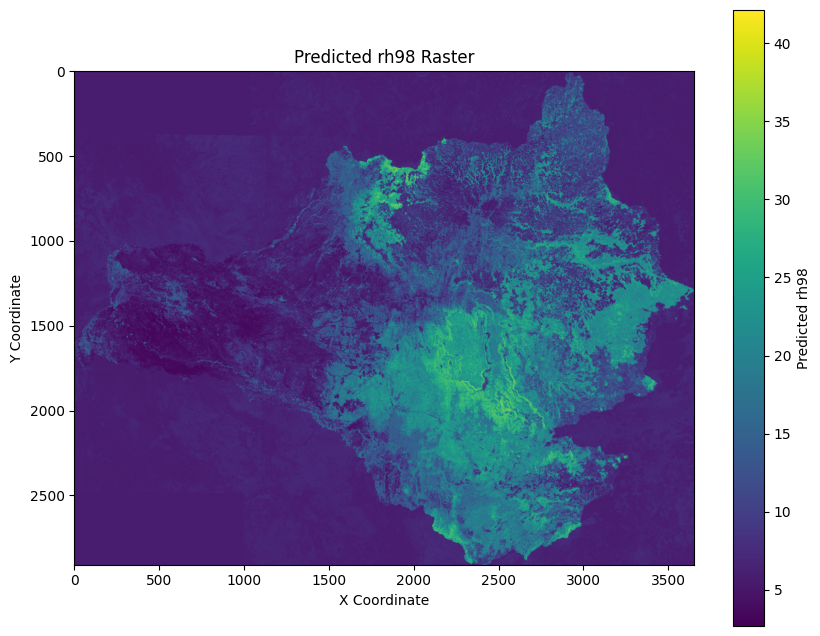

In [ ]:
# --- Plot the predicted raster ---
with rasterio.open(output_raster_path) as src:
    predicted_data = src.read(1)  # Read the single band (rh98 predictions)
    nodata = src.nodata if src.nodata is not None else -9999

# Create a masked array to handle nodata values
predicted_data = np.ma.masked_equal(predicted_data, nodata)

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(predicted_data, cmap='viridis')
plt.colorbar(label='Predicted rh98')
plt.title('Predicted rh98 Raster')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()